In [15]:
import pandas as pd
import string
import numpy as np
import random
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.tools.plotting import scatter_matrix 
from scipy.stats import f_oneway, ttest_ind
import warnings
warnings.filterwarnings('ignore') 
from IPython.display import display
import random; random.seed(0)
import string
import os
import pandas_datareader.data as web
from IPython.display import display
# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)
plt.rcParams['figure.figsize'] = (15, 8)
path='/Users/aybarsatalay/Desktop/Python'
os.chdir(path)
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override()



In [2]:
start_date='2010-08-01'
end_date='2016-08-01'
etfs=['TLT','IEI']
tlt=pdr.get_data_yahoo('TLT', start=start_date, end=end_date)
#tlt=pdr.get_data_yahoo('TLT', start=start_date, end=end_date)
iei=pdr.get_data_yahoo('IEI', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 downloaded

In [12]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pykalman import KalmanFilter


def draw_date_coloured_scatterplot(etfs, prices):
    """
    Create a scatterplot of the two ETF prices, which is
    coloured by the date of the price to indicate the 
    changing relationship between the sets of prices    
    """
    # Create a yellow-to-red colourmap where yellow indicates
    # early dates and red indicates later dates
    plen = len(prices)
    colour_map = plt.cm.get_cmap('YlOrRd')
    colours = np.linspace(0.1, 1, plen)
    
    # Create the scatterplot object
    scatterplot = plt.scatter(
        prices[etfs[0]], prices[etfs[1]],
        s=30, c=colours, cmap=colour_map, 
        edgecolor='k', alpha=0.8
    )
    
    # Add a colour bar for the date colouring and set the 
    # corresponding axis tick labels to equal string-formatted dates
    colourbar = plt.colorbar(scatterplot)
    colourbar.ax.set_yticklabels(
        [str(p.date()) for p in prices[::plen//9].index]
    )
    plt.xlabel(prices.columns[0])
    plt.ylabel(prices.columns[1])
    plt.show()


def calc_slope_intercept_kalman(etfs, prices):
    """
    Utilise the Kalman Filter from the PyKalman package
    to calculate the slope and intercept of the regressed
    ETF prices.
    """
    delta = 1e-5
    trans_cov = delta / (1 - delta) * np.eye(2)
    obs_mat = np.vstack(
        [prices[etfs[0]], np.ones(prices[etfs[0]].shape)]
    ).T[:, np.newaxis]
    
    kf = KalmanFilter(
        n_dim_obs=1, 
        n_dim_state=2,
        initial_state_mean=np.zeros(2),
        initial_state_covariance=np.ones((2, 2)),
        transition_matrices=np.eye(2),
        observation_matrices=obs_mat,
        observation_covariance=1.0,
        transition_covariance=trans_cov
    )
    
    state_means, state_covs = kf.filter(prices[etfs[1]].values)
    return state_means, state_covs    
    

def draw_slope_intercept_changes(prices, state_means):
    """
    Plot the slope and intercept changes from the 
    Kalman Filter calculated values.
    """
    pd.DataFrame(
        dict(
            slope=state_means[:, 0], 
            intercept=state_means[:, 1]
        ), index=prices.index
    ).plot(subplots=True)
    plt.show()


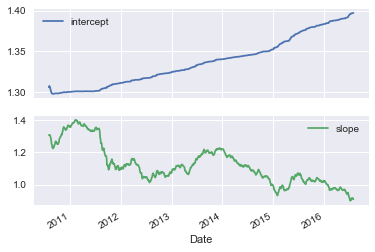

In [16]:
prices = pd.DataFrame(index=tlt.index)
prices['TLT'] = tlt["Adj Close"]
prices['IEI'] = iei["Adj Close"]

state_means, state_covs = calc_slope_intercept_kalman(etfs, prices)
draw_slope_intercept_changes(prices, state_means)


    

In [14]:
print (state_means)

[[1.30646833 1.30646833]
 [1.30563727 1.30568672]
 [1.30741689 1.30717695]
 ...
 [0.91179734 1.3968539 ]
 [0.90899643 1.39696987]
 [0.91012218 1.39698977]]
